## Import libraries

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the data

In [74]:
hr_df=pd.read_csv("HR_Data.csv")

In [75]:
hr_df.head()

,SLNO,Candidate.Ref,DOJ.Extended,Duration.to.accept.offer,Notice.period,Offered.band,Pecent.hike.expected.in.CTC,Percent.hike.offered.in.CTC,Percent.difference.CTC,Joining.Bonus,Candidate.relocate.actual,Gender,Candidate.Source,Rex.in.Yrs,LOB,Location,Age,Status
0,1,2110407,Yes,14,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,34,Joined
1,2,2112635,No,18,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34,Joined
2,3,2112838,No,3,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,Noida,27,Joined
3,4,2115021,No,26,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,34,Joined
4,5,2115125,Yes,1,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,34,Joined


In [76]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8998 entries, 0 to 8997
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SLNO                         8998 non-null   int64  
 1   Candidate.Ref                8998 non-null   int64  
 2   DOJ.Extended                 8998 non-null   object 
 3   Duration.to.accept.offer     8998 non-null   int64  
 4   Notice.period                8998 non-null   int64  
 5   Offered.band                 8998 non-null   object 
 6   Pecent.hike.expected.in.CTC  8998 non-null   float64
 7   Percent.hike.offered.in.CTC  8998 non-null   float64
 8   Percent.difference.CTC       8998 non-null   float64
 9   Joining.Bonus                8998 non-null   object 
 10  Candidate.relocate.actual    8998 non-null   object 
 11  Gender                       8998 non-null   object 
 12  Candidate.Source             8998 non-null   object 
 13  Rex.in.Yrs        

In [77]:
hr_df.describe()

,SLNO,Candidate.Ref,Duration.to.accept.offer,Notice.period,Pecent.hike.expected.in.CTC,Percent.hike.offered.in.CTC,Percent.difference.CTC,Rex.in.Yrs,Age
count,8998.000000,8.998000e+03,8998.000000,8998.000000,8998.000000,8998.00000,8998.000000,8998.000000,8998.000000
mean,5972.247722,2.843815e+06,21.428762,39.282063,43.877143,40.66886,-1.574809,4.239053,29.913647
std,3374.652978,4.864595e+05,25.809202,22.224471,29.826113,36.09506,19.607638,2.547685,4.097889
min,1.000000,2.109586e+06,0.000000,0.000000,-68.830000,-60.53000,-67.270000,0.000000,20.000000
25%,3208.250000,2.386508e+06,3.000000,30.000000,27.270000,22.09000,-8.330000,3.000000,27.000000
50%,5976.500000,2.807490e+06,10.000000,30.000000,40.000000,36.00000,0.000000,4.000000,29.000000
75%,8744.000000,3.300062e+06,33.000000,60.000000,53.850000,50.00000,0.000000,6.000000,34.000000
max,12333.000000,3.836076e+06,224.000000,120.000000,359.770000,471.43000,300.000000,24.000000,60.000000


In [78]:
hr_df.shape

(8998, 18)

### Missing data

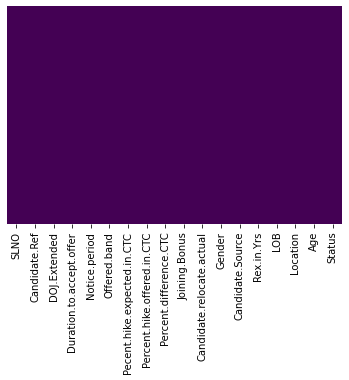

In [79]:
sns.heatmap(hr_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Therefore no missing values.

#### Target variable

In [80]:
hr_df['Status'].value_counts()

Joined        7316
Not Joined    1682
Name: Status, dtype: int64

In [81]:
def change(col):
    if col=="Joined":
        return 1
    else:
        return 0
hr_df['Status']=hr_df['Status'].apply(change)
hr_df['Status'].value_counts()

1    7316
0    1682
Name: Status, dtype: int64

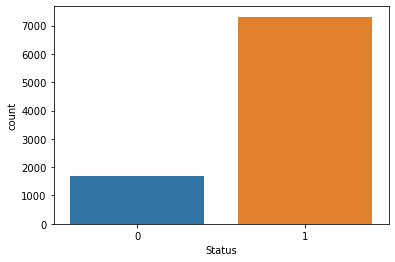

In [82]:
sns.countplot(data=hr_df,x='Status')

In [83]:
for col in hr_df:
    print(col+"  "+str(hr_df[col].nunique()))

SLNO  8995
Candidate.Ref  8995
DOJ.Extended  2
Duration.to.accept.offer  136
Notice.period  7
Offered.band  4
Pecent.hike.expected.in.CTC  2082
Percent.hike.offered.in.CTC  2601
Percent.difference.CTC  1148
Joining.Bonus  2
Candidate.relocate.actual  2
Gender  2
Candidate.Source  3
Rex.in.Yrs  22
LOB  9
Location  11
Age  33
Status  2


## Binary features


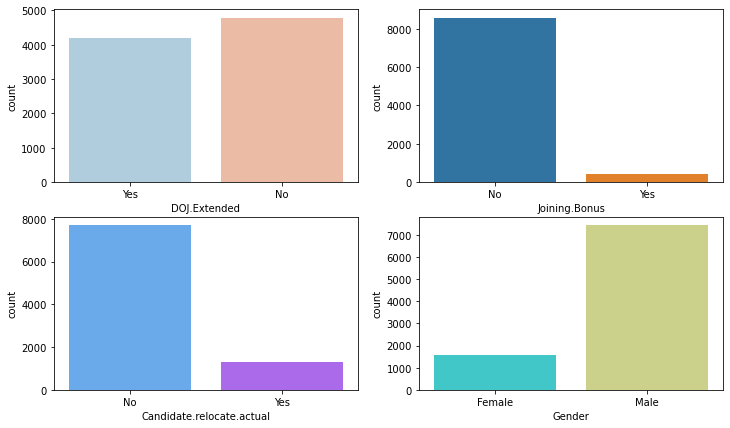

In [84]:
fig,axes=plt.subplots(2,2,figsize=(12,7))

sns.countplot(data=hr_df,x=hr_df['DOJ.Extended'],palette='RdBu_r',ax=axes[0,0])
sns.countplot(data=hr_df,x=hr_df['Joining.Bonus'],ax=axes[0,1])
sns.countplot(data=hr_df,x=hr_df['Candidate.relocate.actual'],palette='cool',ax=axes[1,0])
sns.countplot(data=hr_df,x=hr_df['Gender'],palette='rainbow',ax=axes[1,1])


In [85]:
hr_df['Status'].mean()

0.8130695710157813

In [86]:
hr_df[['DOJ.Extended','Status']].groupby("DOJ.Extended").mean()

,Status
DOJ.Extended,
No,0.810856
Yes,0.815589


In [87]:
hr_df[['Joining.Bonus','Status']].groupby("Joining.Bonus").mean()

,Status
Joining.Bonus,
No,0.813425
Yes,0.805755


In [88]:
hr_df[['Candidate.relocate.actual','Status']].groupby("Candidate.relocate.actual").mean()

,Status
Candidate.relocate.actual,
No,0.781785
Yes,1.000000


In [89]:
hr_df[['Gender','Status']].groupby("Gender").mean()

,Status
Gender,
Female,0.823985
Male,0.810796


Feature which do not contribute much are: 1) Gender 

## Categorical features


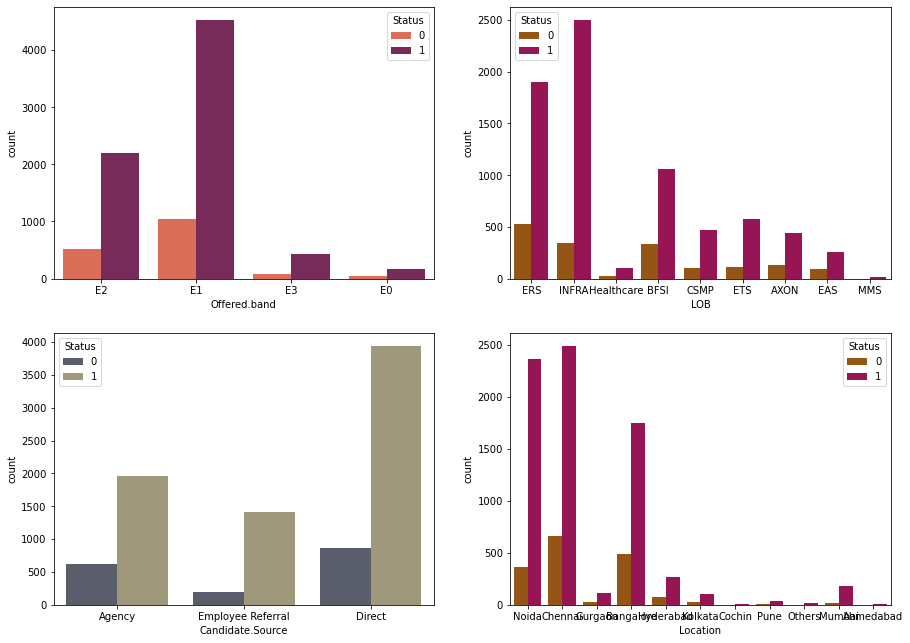

In [90]:
fig,axes=plt.subplots(2,2,figsize=(15,11))

sns.countplot(data=hr_df,x=hr_df['Offered.band'],hue='Status',palette='rocket_r',ax=axes[0,0])
sns.countplot(data=hr_df,x=hr_df['LOB'],hue='Status',palette='brg_r',ax=axes[0,1])
sns.countplot(data=hr_df,x=hr_df['Candidate.Source'],hue='Status',palette='cividis',ax=axes[1,0])
sns.countplot(data=hr_df,x=hr_df['Location'],hue='Status',palette='brg_r',ax=axes[1,1])


In [91]:
hr_df[['Offered.band','Status']].groupby("Offered.band").mean()

,Status
Offered.band,
E0,0.763033
E1,0.813106
E2,0.809735
E3,0.851485


In [92]:
hr_df[['LOB','Status']].groupby("LOB").mean()

,Status
LOB,
AXON,0.774648
BFSI,0.758596
CSMP,0.815199
EAS,0.734104
ERS,0.781211
ETS,0.831169
Healthcare,0.822581
INFRA,0.877895
MMS,1.000000


In [93]:
hr_df[['Candidate.Source','Status']].groupby("Candidate.Source").mean()

,Status
Candidate.Source,
Agency,0.758221
Direct,0.820112
Employee Referral,0.880124


In [94]:
hr_df[['Location','Status']].groupby("Location").mean()

,Status
Location,
Ahmedabad,0.833333
Bangalore,0.781264
Chennai,0.789273
Cochin,0.875000
Gurgaon,0.808219
Hyderabad,0.780059
Kolkata,0.775194
Mumbai,0.893401
Noida,0.866202


Categorical features which do not contribute much to our model are: 1) Candidate.Source	 


## Continuous Variables

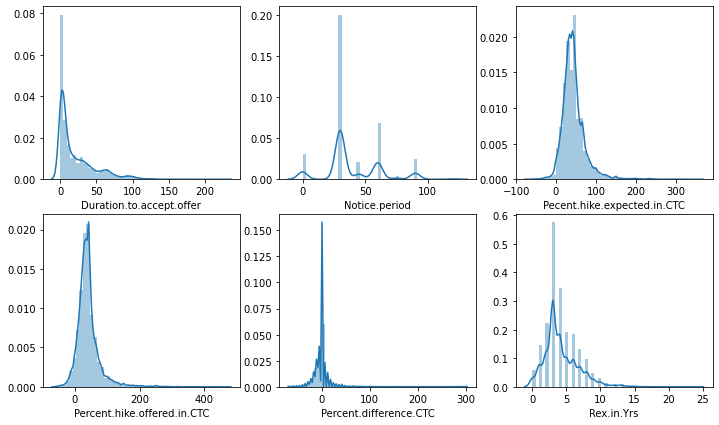

In [95]:
fig, axes = plt.subplots(2,3, figsize=(12, 7))

sns.distplot(hr_df["Duration.to.accept.offer"], ax=axes[0,0])
sns.distplot(hr_df["Notice.period"], ax=axes[0,1])
sns.distplot(hr_df["Pecent.hike.expected.in.CTC"], ax=axes[0,2])
sns.distplot(hr_df["Percent.hike.offered.in.CTC"], ax=axes[1,0])
sns.distplot(hr_df["Percent.difference.CTC"], ax=axes[1,1])
sns.distplot(hr_df["Rex.in.Yrs"], ax=axes[1,2])


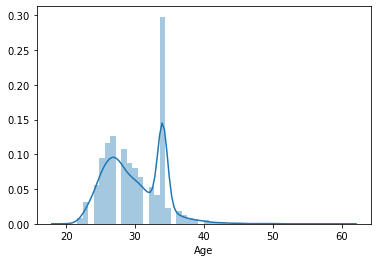

In [96]:
sns.distplot(hr_df["Age"])


In [97]:
hr_df[["Duration.to.accept.offer","Notice.period","Pecent.hike.expected.in.CTC","Percent.hike.offered.in.CTC",
       "Percent.difference.CTC","Rex.in.Yrs","Status"]].groupby("Status").mean()

,Duration.to.accept.offer,Notice.period,Pecent.hike.expected.in.CTC,Percent.hike.offered.in.CTC,Percent.difference.CTC,Rex.in.Yrs
Status,,,,,,
0,24.956599,48.192628,43.882818,38.588460,-2.929298,4.439358
1,20.617687,37.233461,43.875838,41.147158,-1.263402,4.193002


Continuous features which do not contribute much to our model are: 1) Pecent.hike.expected.in.CTC	 2) Percent.difference.CTC	  

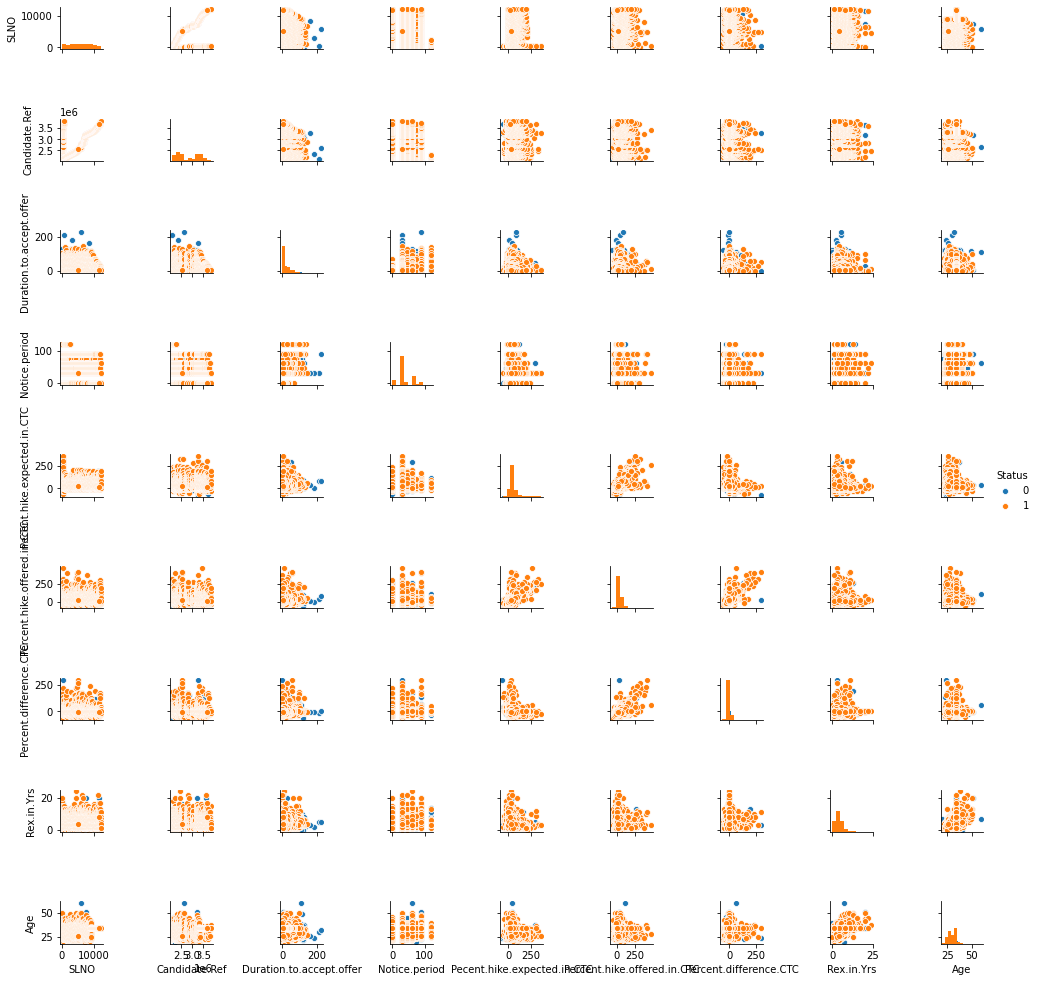

In [98]:
sns.pairplot(data=hr_df,hue='Status',diag_kind="hist", height=1.5)

So lets drop the features that not add much value to our model. We will also drop 1)SLNO	  2)Candidate.Ref	

In [99]:
hr_df.drop(['Gender','Candidate.Source','Pecent.hike.expected.in.CTC',
            'Percent.difference.CTC','Candidate.Ref','SLNO'],axis=1,inplace=True)

hr_df.head()

,DOJ.Extended,Duration.to.accept.offer,Notice.period,Offered.band,Percent.hike.offered.in.CTC,Joining.Bonus,Candidate.relocate.actual,Rex.in.Yrs,LOB,Location,Age,Status
0,Yes,14,30,E2,13.16,No,No,7,ERS,Noida,34,1
1,No,18,30,E2,320.00,No,No,8,INFRA,Chennai,34,1
2,No,3,45,E2,42.84,No,No,4,INFRA,Noida,27,1
3,No,26,30,E2,42.84,No,No,4,INFRA,Noida,34,1
4,Yes,1,120,E2,42.59,No,Yes,6,INFRA,Noida,34,1


## Data Preprocessing


In [157]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

cat_features = ['Offered.band','Candidate.relocate.actual','LOB','Location','DOJ.Extended','Joining.Bonus']

X = pd.get_dummies( hr_df, columns=cat_features, drop_first=True)

In [158]:
sc = MinMaxScaler()
a = sc.fit_transform(hr_df[['Duration.to.accept.offer']])
b = sc.fit_transform(hr_df[['Notice.period']])
c = sc.fit_transform(hr_df[['Percent.hike.offered.in.CTC']])
#sc = MinMaxScaler()
#a = sc.fit_transform(hr_df[['Duration.to.accept.offer']])
#b = sc.fit_transform(hr_df[['Notice.period']])
#c = sc.fit_transform(hr_df[['Percent.difference.CTC']])
d=sc.fit_transform(hr_df[['Rex.in.Yrs']])
e=sc.fit_transform(hr_df[['Age']])


In [159]:
#X['Duration.to.accept.offer'] = a
#X['Notice.period'] = b
#X['Percent.hike.offered.in.CTC']=c
X['Duration.to.accept.offer'] = a
X['Notice.period'] = b
X['Percent.hike.offered.in.CTC']=c
X['Rex.in.Yrs']=d
X['Age']=e

In [160]:
X.shape

(8998, 30)

## Resampling

Text(0.5, 1.0, 'Class Distribution Before Resampling')

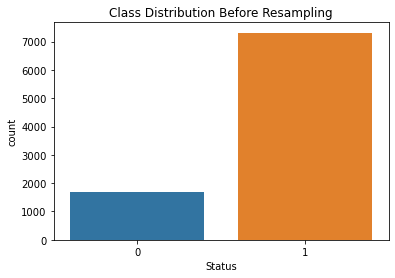

In [161]:
sns.countplot('Status', data=hr_df).set_title('Class Distribution Before Resampling')

In [162]:
X_no = X[X.Status == 0]
X_yes = X[X.Status == 1]

In [163]:
print(len(X_no),len(X_yes))

1682 7316


In [164]:
X_yes_upsampled = X_yes.sample(n=len(X_no), replace=True, random_state=42)
print(len(X_yes_upsampled))

1682


In [165]:
X_upsampled = X_no.append(X_yes_upsampled).reset_index(drop=True)
print(len(X_upsampled))

3364


Text(0.5, 1.0, 'Class Distribution After Resampling')

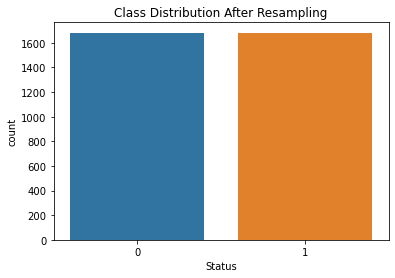

In [166]:
sns.countplot('Status', data=X_upsampled).set_title('Class Distribution After Resampling')

# ML model

### train test and split

Now it's time to do a train test split, and train our model!


In [167]:
from sklearn.model_selection import train_test_split

In [168]:
x = X_upsampled.drop(['Status'], axis=1) #features (independent variables)
y = X_upsampled['Status'] #target (dependent variable)

In [169]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.25,random_state=70)

## Logistic Regression 


In [170]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

lr.fit(X_train,Y_train)

LogisticRegression()

In [171]:
lr_pred=lr.predict(X_test)

In [172]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 

In [173]:
Y_test[:10]

1835    1
1537    0
3015    1
2586    1
1731    1
1427    0
3263    1
2731    1
3184    1
2164    1
Name: Status, dtype: int64

In [174]:
lr_pred[:10]

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1], dtype=int64)

In [175]:
confusion_matrix(Y_test,lr_pred)

array([[318, 111],
       [154, 258]], dtype=int64)

In [176]:
accuracy_score(Y_test,lr_pred)*100 

68.48989298454221

In [177]:
print(classification_report(Y_test,lr_pred))

              precision    recall  f1-score   support

           0       0.67      0.74      0.71       429
           1       0.70      0.63      0.66       412

    accuracy                           0.68       841
   macro avg       0.69      0.68      0.68       841
weighted avg       0.69      0.68      0.68       841



So accuracy of our model with logistic regression is approx 68.5%.

## Random Forest

In [178]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100)

rfc.fit(X_train, Y_train)

RandomForestClassifier()

In [179]:
rf_pred = rfc.predict(X_test)

In [180]:
Y_test[:10]

1835    1
1537    0
3015    1
2586    1
1731    1
1427    0
3263    1
2731    1
3184    1
2164    1
Name: Status, dtype: int64

In [181]:
rf_pred[:10]

array([1, 0, 1, 0, 0, 1, 1, 1, 1, 1], dtype=int64)

In [182]:
confusion_matrix(Y_test,rf_pred)

array([[288, 141],
       [113, 299]], dtype=int64)

In [183]:
accuracy_score(Y_test,rf_pred)*100 

69.79785969084423

In [184]:
print(classification_report(Y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.72      0.67      0.69       429
           1       0.68      0.73      0.70       412

    accuracy                           0.70       841
   macro avg       0.70      0.70      0.70       841
weighted avg       0.70      0.70      0.70       841



So we get the accuracy of our model as 69.80% which is little better than previous algorithm model.

###### Thus finally we can say that we have achieved the accuracy of our HR Churn prediction model as approx 70%